In [72]:
import pandas as pd # нужен
import matplotlib.pyplot as plt # нужен
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns # нужен
import numpy as np # нужен
import math
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import Birch # nado 


path = (r'~/Data_science/NFT_Top_Collections.csv') # Импортируем данные
nft = pd.read_csv(path) # Читаем данные
nft = nft.dropna(axis = 0)

In [73]:
# Инициируем все, удаляем плохие данные

In [74]:
nft

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.915600,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
5,5,I'M AIKO,2904.70,4.264681e+05,2530.877143,371583.382100,1411,1.20,176.1840,2.058611,302.245254,599,1206,49.67,"Art,Collectibles,Graphics,2D,Image",https://aiko.io,https://content.solsea.io/files/thumbnail/1633...
9,9,Meta Waifus,1844.59,2.708227e+05,989.491267,145277.107800,1156,1.27,186.4614,1.595666,234.275695,376,643,58.48,"3D,PFP,Metaverse,Art,Collectibles",https://metawaifus.com,https://content.solsea.io/files/thumbnail/1637...
12,12,Hot Bunnies NFT,1590.89,2.335745e+05,527.850000,77498.937000,412,1.00,146.8200,3.861383,566.928325,243,391,62.15,"Digital,Metaverse,Art,Picture,Image",https://hotbunniesnft.com/,https://content.solsea.io/files/thumbnail/1637...
13,13,BOSS BULLS ™ CLUB,1236.33,1.815180e+05,244.686667,35924.896400,370,1.49,218.7618,3.341432,490.589110,99,127,77.95,"Art,Digital,PFP,3D",https://www.bossbullsclub.com,https://content.solsea.io/files/thumbnail/1637...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,2.65,3.890730e+02,4.095455,601.294636,11,0.20,29.3640,0.240909,35.370273,13,17,76.47,"Digital,3D,2D,Graphics,Metaverse",https://www.MetaOceanBox.com/,https://content.solsea.io/files/thumbnail/1641...
578,584,Cannababy Society,1.00,1.468200e+02,13.000000,1908.660000,1,1.00,146.8200,1.000000,146.820000,1,13,7.69,"Digital,Metaverse,Collectibles,Art,3D",https://www.everythingnft.online/cannababy,https://content.solsea.io/files/thumbnail/1642...
579,585,Mountain Lionz,1.00,1.468200e+02,5.916667,868.685000,12,0.09,13.2138,0.083333,12.235000,49,71,69.01,"Collectibles,Art",https://www.mountainlionz.com,https://content.solsea.io/files/thumbnail/1641...
580,586,AI Motion Art,0.70,1.027740e+02,0.000000,0.000000,1,0.50,73.4100,0.700000,102.774000,6,24,25.00,"Digital,Physical,Art,Painting",https://aimotionart.com,https://content.solsea.io/files/thumbnail/1634...


In [75]:
# Смотрим что осталось

In [76]:
nft["Sales"] = nft["Sales"]/nft["Sales"].max()
nft["Average_Price_USD"] = nft["Average_Price_USD"]/nft["Average_Price_USD"].max()
nft["Floor_Price_USD"] = nft["Floor_Price_USD"]/nft["Floor_Price_USD"].max()
nft["Owners"] = nft["Owners"]/nft["Owners"].max()
nft["Assets"] = nft["Assets"]/nft["Assets"].max()
nft["Owner_Asset_Ratio"] = nft["Owner_Asset_Ratio"]/nft["Owner_Asset_Ratio"].max()

In [77]:
# Нормируем данные

In [78]:
nft

,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.915600,0.073494,39.50,0.237866,74.471667,1.000000,0.005879,0.004819,0.7500,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
5,5,I'M AIKO,2904.70,4.264681e+05,2530.877143,371583.382100,0.283333,1.20,0.007226,2.058611,0.027643,0.293484,0.363253,0.4967,"Art,Collectibles,Graphics,2D,Image",https://aiko.io,https://content.solsea.io/files/thumbnail/1633...
9,9,Meta Waifus,1844.59,2.708227e+05,989.491267,145277.107800,0.232129,1.27,0.007648,1.595666,0.021426,0.184223,0.193675,0.5848,"3D,PFP,Metaverse,Art,Collectibles",https://metawaifus.com,https://content.solsea.io/files/thumbnail/1637...
12,12,Hot Bunnies NFT,1590.89,2.335745e+05,527.850000,77498.937000,0.082731,1.00,0.006022,3.861383,0.051850,0.119059,0.117771,0.6215,"Digital,Metaverse,Art,Picture,Image",https://hotbunniesnft.com/,https://content.solsea.io/files/thumbnail/1637...
13,13,BOSS BULLS ™ CLUB,1236.33,1.815180e+05,244.686667,35924.896400,0.074297,1.49,0.008973,3.341432,0.044869,0.048506,0.038253,0.7795,"Art,Digital,PFP,3D",https://www.bossbullsclub.com,https://content.solsea.io/files/thumbnail/1637...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,2.65,3.890730e+02,4.095455,601.294636,0.002209,0.20,0.001204,0.240909,0.003235,0.006369,0.005120,0.7647,"Digital,3D,2D,Graphics,Metaverse",https://www.MetaOceanBox.com/,https://content.solsea.io/files/thumbnail/1641...
578,584,Cannababy Society,1.00,1.468200e+02,13.000000,1908.660000,0.000201,1.00,0.006022,1.000000,0.013428,0.000490,0.003916,0.0769,"Digital,Metaverse,Collectibles,Art,3D",https://www.everythingnft.online/cannababy,https://content.solsea.io/files/thumbnail/1642...
579,585,Mountain Lionz,1.00,1.468200e+02,5.916667,868.685000,0.002410,0.09,0.000542,0.083333,0.001119,0.024008,0.021386,0.6901,"Collectibles,Art",https://www.mountainlionz.com,https://content.solsea.io/files/thumbnail/1641...
580,586,AI Motion Art,0.70,1.027740e+02,0.000000,0.000000,0.000201,0.50,0.003011,0.700000,0.009400,0.002940,0.007229,0.2500,"Digital,Physical,Art,Painting",https://aimotionart.com,https://content.solsea.io/files/thumbnail/1634...


In [79]:
# Смотрим что все прошло успешно

In [80]:
nft = nft.drop(columns = ["Volume","Market_Cap", "Average_Price", "Floor_Price","Website", "Logo", "Category"],axis =1)

In [81]:
# nft = nft.drop(columns = ["Category","Website", "Logo"],axis =1)

#nft.drop(nft[nft['Market_Cap_USD'] == 0.0].index, inplace = True) # удаляем нули здесь, потому что их тут много, но это не обязательно, топ НФТ можно построить и с ними)))

In [82]:
# Удаляем бесполезные колонки

In [83]:
nft

,Index,Name,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,0,basis.markets,4.001818e+06,103969.915600,0.073494,0.237866,1.000000,0.005879,0.004819,0.7500
5,5,I'M AIKO,4.264681e+05,371583.382100,0.283333,0.007226,0.027643,0.293484,0.363253,0.4967
9,9,Meta Waifus,2.708227e+05,145277.107800,0.232129,0.007648,0.021426,0.184223,0.193675,0.5848
12,12,Hot Bunnies NFT,2.335745e+05,77498.937000,0.082731,0.006022,0.051850,0.119059,0.117771,0.6215
13,13,BOSS BULLS ™ CLUB,1.815180e+05,35924.896400,0.074297,0.008973,0.044869,0.048506,0.038253,0.7795
...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,3.890730e+02,601.294636,0.002209,0.001204,0.003235,0.006369,0.005120,0.7647
578,584,Cannababy Society,1.468200e+02,1908.660000,0.000201,0.006022,0.013428,0.000490,0.003916,0.0769
579,585,Mountain Lionz,1.468200e+02,868.685000,0.002410,0.000542,0.001119,0.024008,0.021386,0.6901
580,586,AI Motion Art,1.027740e+02,0.000000,0.000201,0.003011,0.009400,0.002940,0.007229,0.2500


In [84]:
# Проверяем

In [85]:
nft.corr()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
Index,1.000000,-0.194681,-0.352059,-0.387925,-0.021775,-0.222767,-0.336481,-0.333560,-0.274713
Volume_USD,-0.194681,1.000000,0.336854,0.094460,0.217398,0.833787,0.050087,0.041804,0.089185
Market_Cap_USD,-0.352059,0.336854,1.000000,0.357250,0.025849,0.197482,0.387028,0.453841,-0.000741
Sales,-0.387925,0.094460,0.357250,1.000000,-0.034031,-0.026963,0.874261,0.840765,0.102533
Floor_Price_USD,-0.021775,0.217398,0.025849,-0.034031,1.000000,0.363359,-0.049177,-0.059221,0.059223
Average_Price_USD,-0.222767,0.833787,0.197482,-0.026963,0.363359,1.000000,-0.062952,-0.077243,0.038352
Owners,-0.336481,0.050087,0.387028,0.874261,-0.049177,-0.062952,1.000000,0.927723,0.137130
Assets,-0.333560,0.041804,0.453841,0.840765,-0.059221,-0.077243,0.927723,1.000000,-0.038661
Owner_Asset_Ratio,-0.274713,0.089185,-0.000741,0.102533,0.059223,0.038352,0.137130,-0.038661,1.000000


In [86]:
# Смотрим на корреляцию

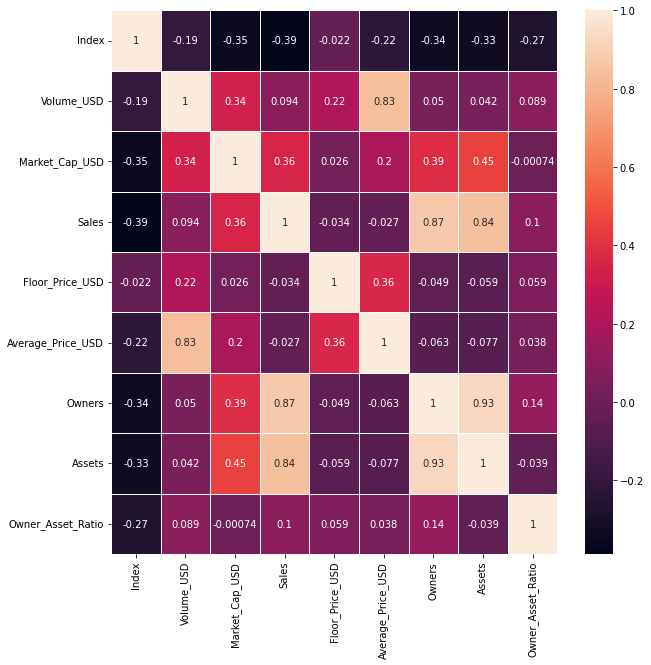

In [87]:
plt.subplots(figsize=(10,10))
sns.heatmap(nft.corr(),annot=True,linewidths = 1)
plt.show()

In [88]:
# Ничего не понятно, пострим наглядную тепловую карту

In [89]:
nft.describe()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,238.000000,2.380000e+02,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,293.617647,3.211288e+04,8734.269225,0.035940,0.010928,0.022247,0.030455,0.040611,0.482028
std,163.970541,2.617954e+05,29707.737700,0.101657,0.067724,0.076868,0.077916,0.085208,0.259900
min,0.000000,8.809200e+01,0.000000,0.000201,0.000120,0.000352,0.000490,0.000301,0.006200
25%,162.250000,1.299357e+03,0.000000,0.002861,0.000783,0.003651,0.003430,0.007530,0.270725
50%,289.500000,2.838765e+03,704.117811,0.008133,0.001807,0.008244,0.011514,0.016416,0.511550
75%,424.750000,1.002707e+04,5984.872600,0.024498,0.006022,0.016073,0.023885,0.035166,0.677175
max,587.000000,4.001818e+06,371583.382100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# Смотрим описание данных

In [91]:
# Аналитика по "ящикам с усами"
# "Ящики с усами" это отличныый иструмент для того, чтобы посмотреть выбросы в наших данных более наглядным способом

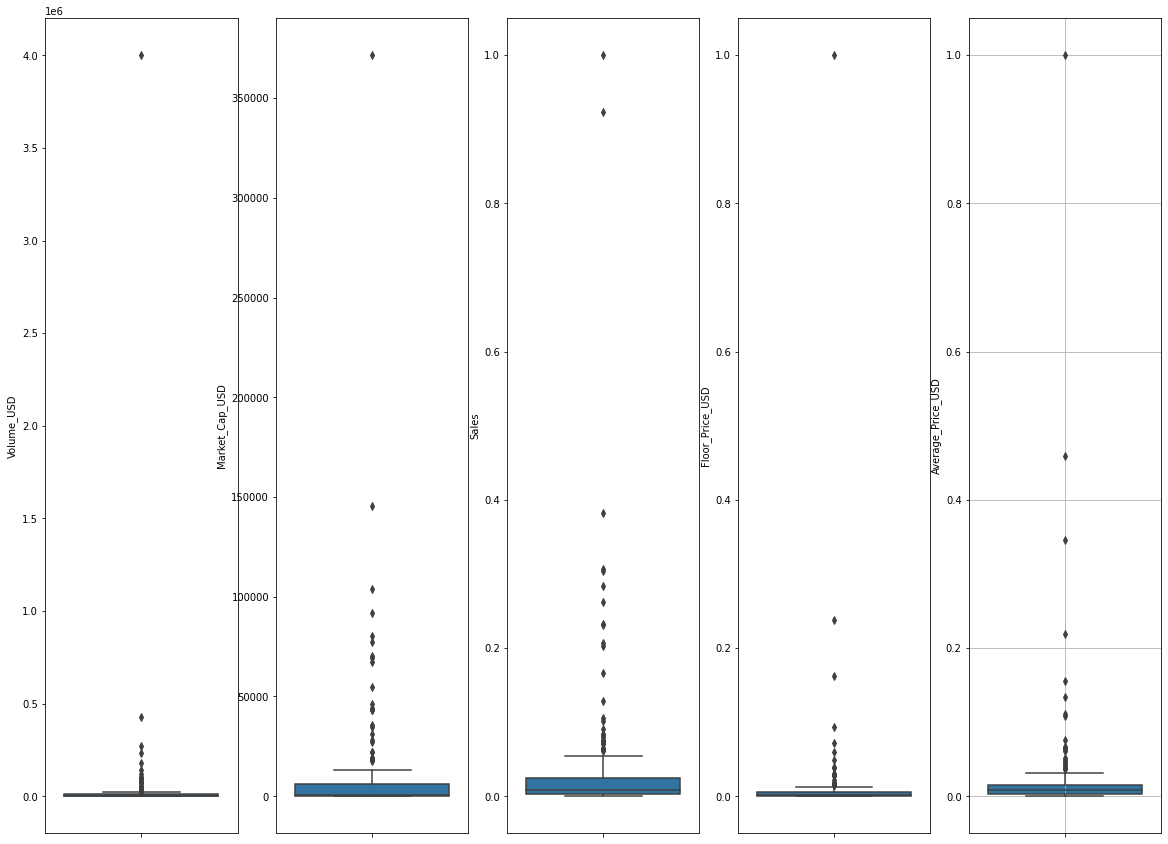

In [92]:
fig,ax = plt.subplots(1,5,figsize=(20,15))
sns.boxplot(y =nft.Volume_USD ,data = nft,ax = ax[0])
sns.boxplot(y =nft.Market_Cap_USD ,data = nft,ax = ax[1])
sns.boxplot(y =nft.Sales ,data = nft,ax = ax[2])
sns.boxplot(y =nft.Floor_Price_USD,data = nft,ax = ax[3])
sns.boxplot(y =nft.Average_Price_USD,data = nft,ax = ax[4])
plt.grid(True)
plt.show()

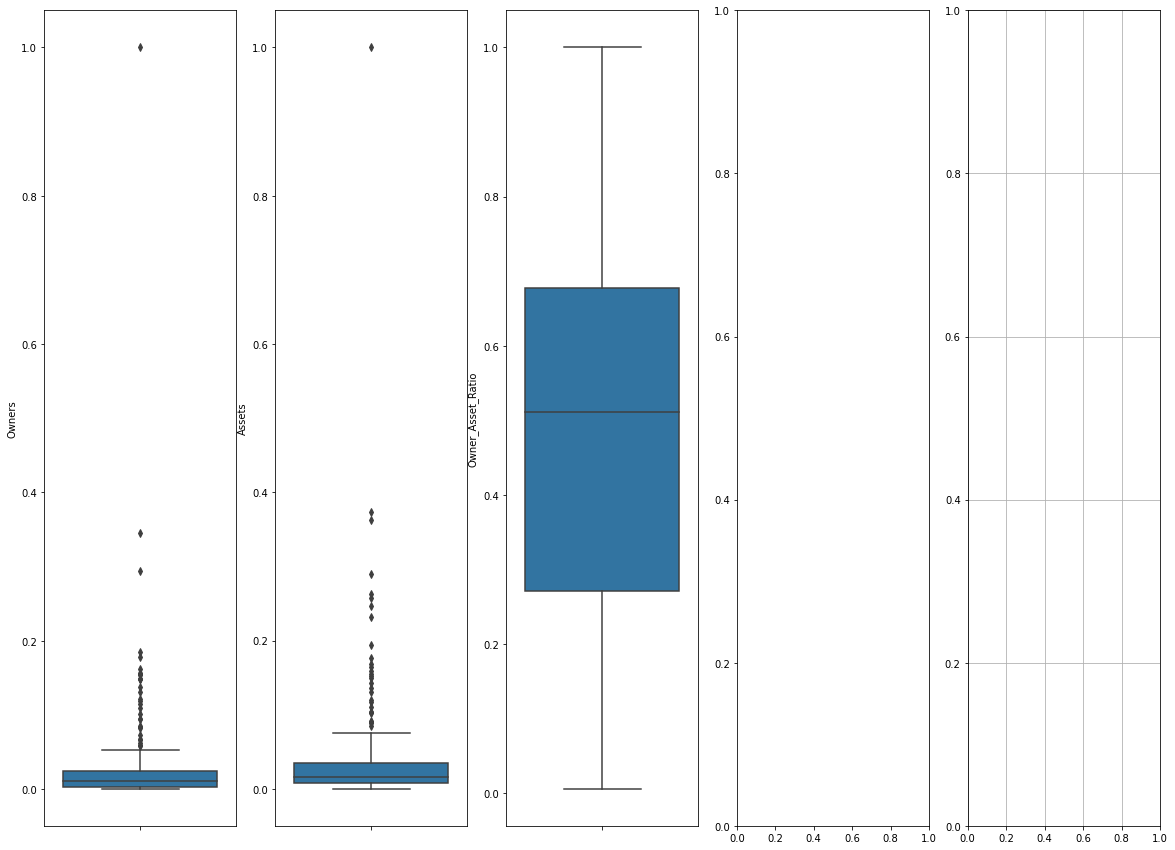

In [93]:
fig,ax = plt.subplots(1,5,figsize=(20,15))
sns.boxplot(y =nft.Owners,data = nft,ax = ax[0])
sns.boxplot(y =nft.Assets,data = nft,ax = ax[1])
sns.boxplot(y =nft.Owner_Asset_Ratio ,data = nft,ax = ax[2])
plt.grid(True)
plt.show()

In [94]:
new_index = nft.Owner_Asset_Ratio.sort_values(ascending = False).index.values
sorted_nft = nft.reindex(new_index)
sorted_nft.index = range(0,238)
top_nft = sorted_nft.loc[0:238]
top_nft

,Index,Name,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,369,Kreechures,1744.2216,875.04720,0.002008,0.060219,0.015952,0.001960,0.001205,1.0000
1,489,Famous hot dog club,836.8740,0.00000,0.003213,0.006022,0.004784,0.000490,0.000301,1.0000
2,93,DazedDucks,24182.7222,9447.86700,0.013855,0.038540,0.032054,0.006369,0.003916,1.0000
3,168,Kingdom of Dwarves: Whitelist,8948.6790,0.00000,0.008835,0.015055,0.018601,0.001960,0.001205,1.0000
4,308,Scar Solciety,2554.6680,0.00000,0.005221,0.002710,0.008986,0.000980,0.000602,1.0000
...,...,...,...,...,...,...,...,...,...,...
233,250,MetaLand,4199.0520,34476.42695,0.003815,0.002409,0.020213,0.001470,0.046988,0.0192
234,384,Real Deal Xmas 2021,1615.0200,12920.16000,0.002209,0.006022,0.013428,0.000490,0.026506,0.0114
235,403,SOL CASH NFT,1468.2000,13213.80000,0.002008,0.006022,0.013428,0.000490,0.027108,0.0111
236,110,Lift-off Pass,18829.6650,0.00000,0.005422,0.028604,0.063783,0.000490,0.031928,0.0094


In [95]:
# Сортируем данные

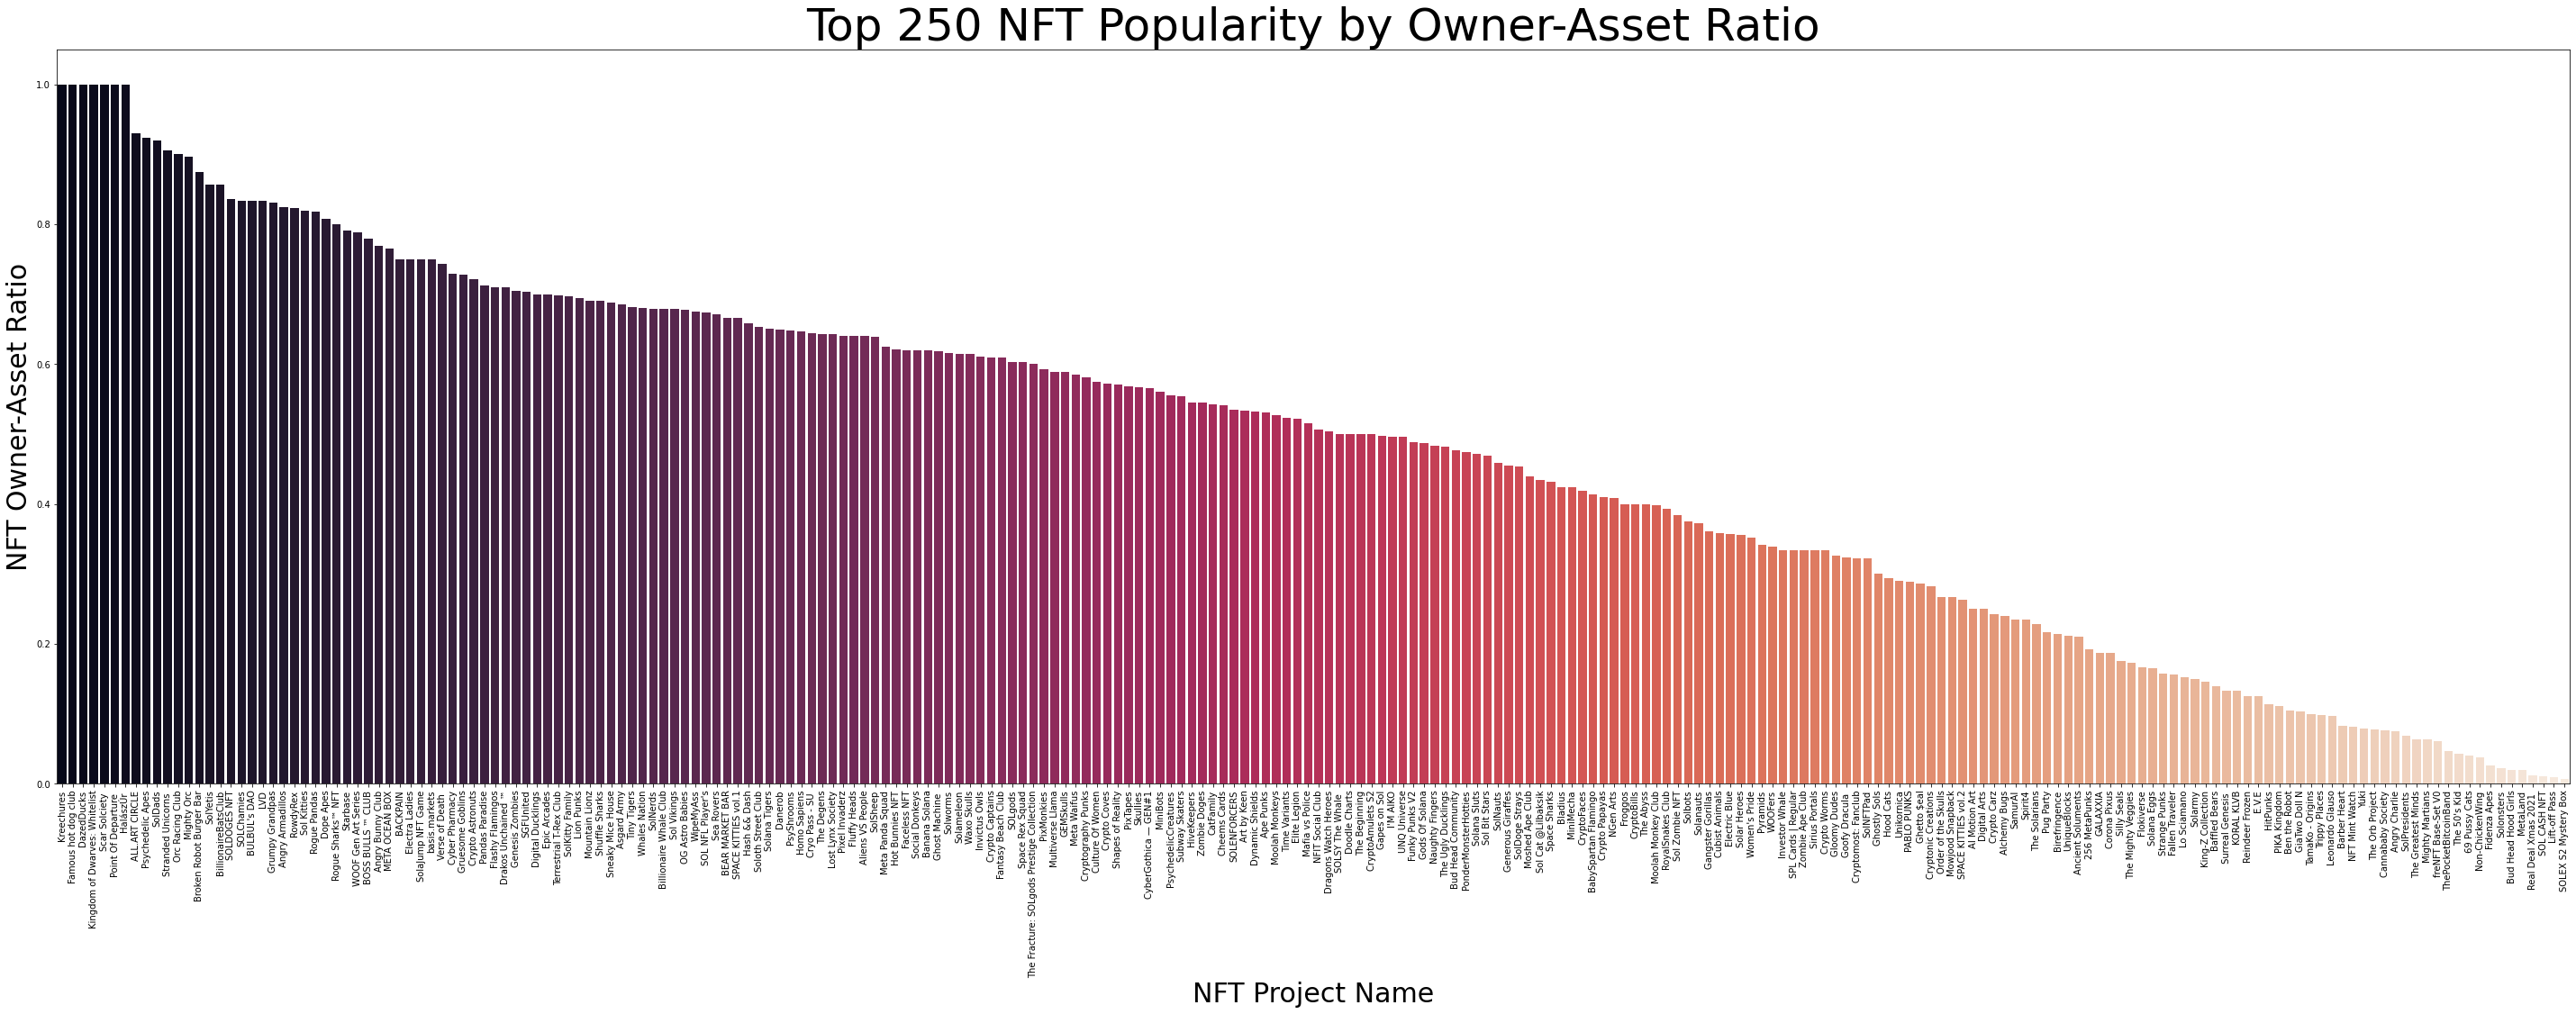

In [96]:
plt.subplots(figsize=(50,15))
sns.barplot(x=top_nft.Name,y=top_nft.Owner_Asset_Ratio.sort_values(),palette = "rocket")
plt.xticks(rotation = 90)
plt.xlabel("NFT Project Name",fontsize =30)
plt.ylabel("NFT Owner-Asset Ratio",fontsize =30)
plt.title("Top 250 NFT Popularity by Owner-Asset Ratio",fontsize =50)
plt.show()

In [97]:
# Строим топ нфт, так как уже отсортировали

In [98]:
av_price_index = nft.Average_Price_USD.sort_values(ascending = False).index.values
floor_price_index = nft.Floor_Price_USD.sort_values(ascending = False).index.values
av_price_data = nft.reindex(av_price_index)
floor_price_data = nft.reindex(floor_price_index)

In [99]:
av_price_data.Average_Price_USD = av_price_data.Average_Price_USD/max(av_price_data.Average_Price_USD)
floor_price_data.Floor_Price_USD = floor_price_data.Floor_Price_USD/max(floor_price_data.Floor_Price_USD)
av_price_data = av_price_data.reindex(range(0,50))
floor_price_data = floor_price_data.reindex(range(0,50))
av_price_data = av_price_data.iloc[0:50]
floor_price_data = floor_price_data.iloc[0:50]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


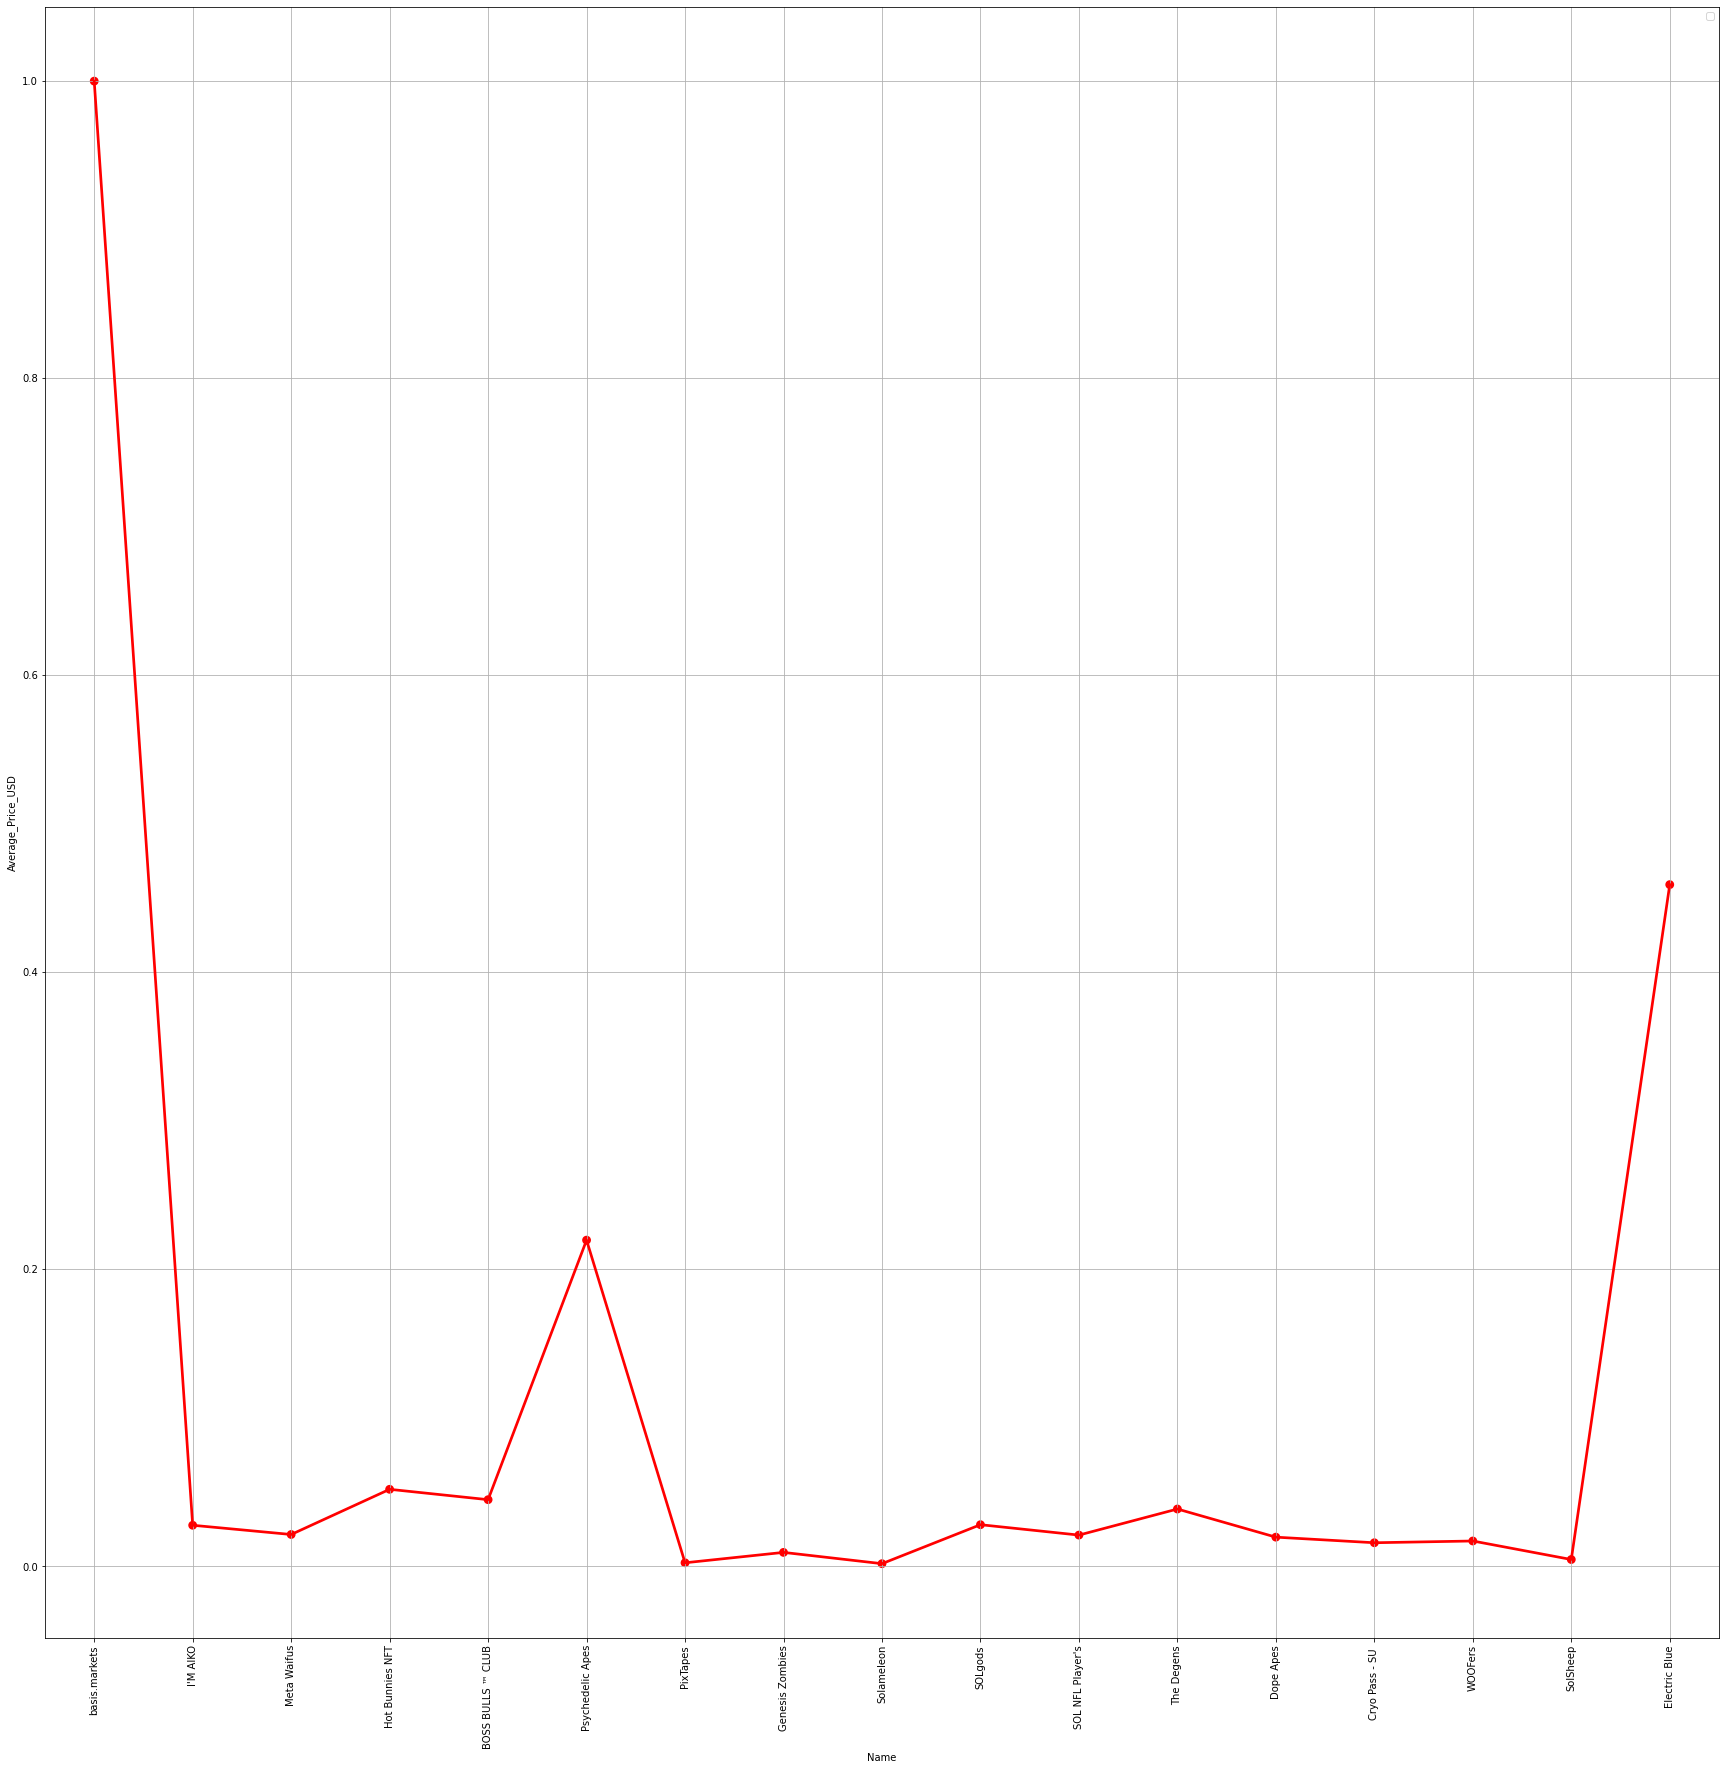

In [100]:
plt.subplots(figsize=(30,30))
sns.pointplot(x = "Name",y="Average_Price_USD",data =av_price_data,color="red" )
plt.grid(True)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [101]:
# Ну и смотрим самые популярные

In [102]:
nft

,Index,Name,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,0,basis.markets,4.001818e+06,103969.915600,0.073494,0.237866,1.000000,0.005879,0.004819,0.7500
5,5,I'M AIKO,4.264681e+05,371583.382100,0.283333,0.007226,0.027643,0.293484,0.363253,0.4967
9,9,Meta Waifus,2.708227e+05,145277.107800,0.232129,0.007648,0.021426,0.184223,0.193675,0.5848
12,12,Hot Bunnies NFT,2.335745e+05,77498.937000,0.082731,0.006022,0.051850,0.119059,0.117771,0.6215
13,13,BOSS BULLS ™ CLUB,1.815180e+05,35924.896400,0.074297,0.008973,0.044869,0.048506,0.038253,0.7795
...,...,...,...,...,...,...,...,...,...,...
569,575,META OCEAN BOX,3.890730e+02,601.294636,0.002209,0.001204,0.003235,0.006369,0.005120,0.7647
578,584,Cannababy Society,1.468200e+02,1908.660000,0.000201,0.006022,0.013428,0.000490,0.003916,0.0769
579,585,Mountain Lionz,1.468200e+02,868.685000,0.002410,0.000542,0.001119,0.024008,0.021386,0.6901
580,586,AI Motion Art,1.027740e+02,0.000000,0.000201,0.003011,0.009400,0.002940,0.007229,0.2500


In [103]:
# Снова смотрим, ничего ли не натворили

In [104]:
nft.drop(nft[nft['Market_Cap_USD'] == 0.0].index, inplace = True)

In [105]:
# В этой колоне есть нули, поэтому удаляем и смотрим что осталось

In [106]:
nft.describe()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,258.257576,5.171896e+04,15748.152088,0.056925,0.005896,0.020466,0.045488,0.060748,0.481675
std,165.569552,3.504612e+05,38540.562786,0.132360,0.022333,0.091825,0.101002,0.109215,0.243800
min,0.000000,8.809200e+01,151.462686,0.000201,0.000120,0.000352,0.000490,0.000904,0.006200
25%,112.750000,1.595566e+03,1393.256255,0.005572,0.000602,0.002376,0.005879,0.011747,0.322450
50%,237.500000,4.701176e+03,5265.350788,0.015261,0.001475,0.006534,0.016169,0.027711,0.529100
75%,387.500000,1.817558e+04,11103.262500,0.056426,0.004065,0.013565,0.038094,0.056325,0.645450
max,587.000000,4.001818e+06,371583.382100,1.000000,0.237866,1.000000,1.000000,1.000000,1.000000


In [107]:
# Все печально, данных, которые подлежат кластеризации по методу очень мало

In [108]:
nft["Index"] = nft["Index"]+1

In [109]:
# Прибавляем индексам +1, так как не будет работать метод расчета евклидого расстояния

In [110]:
nft.describe()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,259.257576,5.171896e+04,15748.152088,0.056925,0.005896,0.020466,0.045488,0.060748,0.481675
std,165.569552,3.504612e+05,38540.562786,0.132360,0.022333,0.091825,0.101002,0.109215,0.243800
min,1.000000,8.809200e+01,151.462686,0.000201,0.000120,0.000352,0.000490,0.000904,0.006200
25%,113.750000,1.595566e+03,1393.256255,0.005572,0.000602,0.002376,0.005879,0.011747,0.322450
50%,238.500000,4.701176e+03,5265.350788,0.015261,0.001475,0.006534,0.016169,0.027711,0.529100
75%,388.500000,1.817558e+04,11103.262500,0.056426,0.004065,0.013565,0.038094,0.056325,0.645450
max,588.000000,4.001818e+06,371583.382100,1.000000,0.237866,1.000000,1.000000,1.000000,1.000000


In [111]:
nft["Market_Cap_USD"] = np.log(nft["Market_Cap_USD"])
nft["Volume_USD"] = np.log(nft["Volume_USD"])
nft["Sales"] = np.log(nft["Sales"])
nft["Average_Price_USD"] = np.log(nft["Average_Price_USD"])
nft["Floor_Price_USD"] = np.log(nft["Floor_Price_USD"])
nft["Owners"] = np.log(nft["Owners"])
nft["Assets"] = np.log(nft["Assets"])

In [112]:
# Логарифмируем, потому что нормальное распределение очень плохое

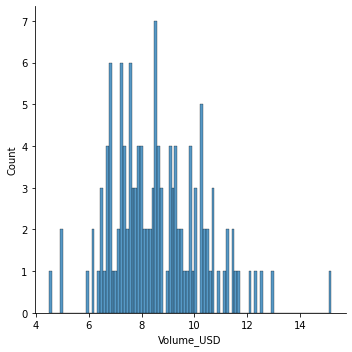

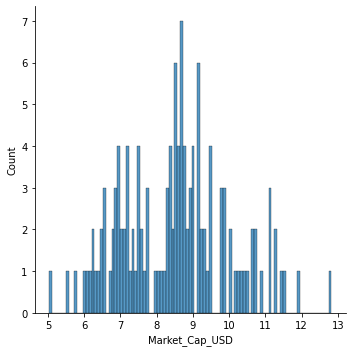

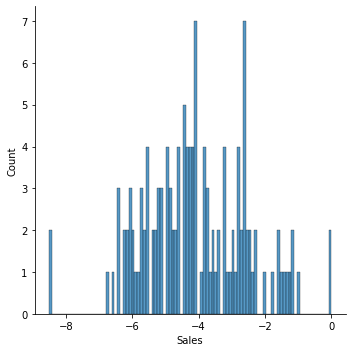

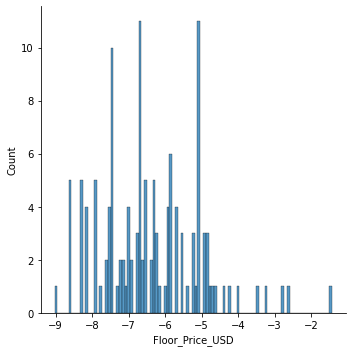

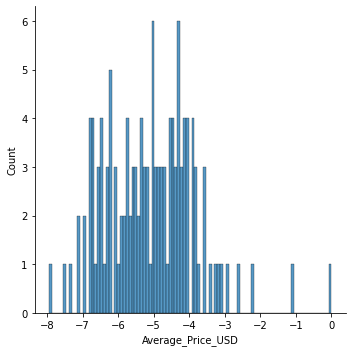

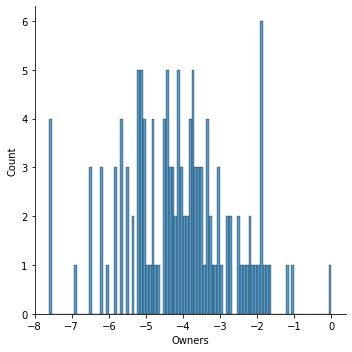

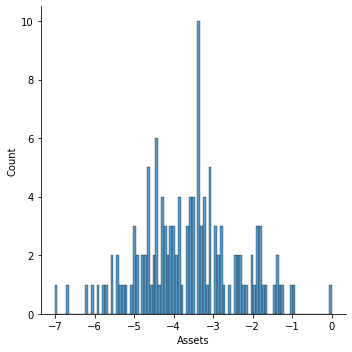

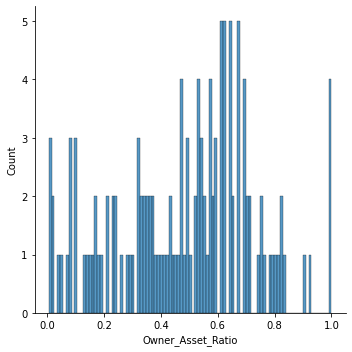

In [113]:
sns.displot(nft['Volume_USD'], bins = 99)
sns.displot(nft['Market_Cap_USD'], bins = 99)
sns.displot(nft['Sales'], bins = 99)
sns.displot(nft['Floor_Price_USD'], bins = 99)
sns.displot(nft['Average_Price_USD'], bins = 99)
sns.displot(nft['Owners'], bins = 99)
sns.displot(nft['Assets'], bins = 99)
sns.displot(nft['Owner_Asset_Ratio'], bins = 99)
plt.show()

In [114]:
# Собственно, смотрим на графики нормального распределения

In [115]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 581
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              132 non-null    int64  
 1   Name               132 non-null    object 
 2   Volume_USD         132 non-null    float64
 3   Market_Cap_USD     132 non-null    float64
 4   Sales              132 non-null    float64
 5   Floor_Price_USD    132 non-null    float64
 6   Average_Price_USD  132 non-null    float64
 7   Owners             132 non-null    float64
 8   Assets             132 non-null    float64
 9   Owner_Asset_Ratio  132 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 11.3+ KB


In [116]:
# Смотрим, чтоб не было колонок, которые не числовые

In [117]:
nft = nft.drop(columns = ["Name"],axis =1)

In [118]:
nft = nft.drop(columns = ["Index"],axis =1)

In [119]:
# Удаляем эти ненужные уже нам колонки

In [120]:
nft

,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
0,15.202259,11.551857,-2.610552,-1.436048,0.000000,-5.136289,-5.335131,0.7500
5,12.963293,12.825529,-1.261131,-4.930028,-3.588387,-1.225934,-1.012656,0.4967
9,12.509220,11.886398,-1.460464,-4.873332,-3.843127,-1.691606,-1.641575,0.5848
12,12.361256,11.258019,-2.492162,-5.112349,-2.959393,-2.128134,-2.139013,0.6215
13,12.109110,10.489186,-2.599682,-4.713573,-3.104019,-3.026075,-3.263533,0.7795
...,...,...,...,...,...,...,...,...
562,6.180095,7.049133,-5.948236,-6.721787,-5.684481,-4.730823,-4.673733,0.5806
569,5.963767,6.399085,-6.115290,-6.721787,-5.733754,-5.056246,-5.274507,0.7647
578,4.989207,7.554157,-8.513185,-5.112349,-4.310419,-7.621195,-5.542771,0.0769
579,4.989207,6.766981,-6.028279,-7.520295,-6.795325,-3.729375,-3.845040,0.6901


In [121]:
# Смотрим

In [122]:
euclide = euclidean_distances(nft,nft)

In [123]:
# Расчитываем евклидово расстояние

In [124]:
df = pd.DataFrame(euclide)
df

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.000000,8.220669,7.797892,7.051633,6.310266,11.257290,8.083051,12.685423,8.729753,7.128480,...,13.061947,13.225932,13.318906,12.933648,13.555767,13.179416,13.601811,13.924617,15.042613,14.465243
1,8.220669,0.000000,1.347643,2.619554,4.080226,4.251217,4.663315,5.347480,3.121791,5.785319,...,11.945317,11.355184,11.717735,10.068582,13.020848,11.603717,12.432815,14.356803,12.423313,12.046523
2,7.797892,1.347643,0.000000,1.660908,2.903683,3.905457,3.374208,5.184753,2.282798,4.490720,...,10.746623,10.169863,10.516543,9.036498,11.807705,10.432414,11.232256,13.265466,11.329814,11.221901
3,7.051633,2.619554,1.660908,0.000000,1.715224,4.853835,3.023835,6.065123,1.912447,3.566770,...,9.769529,9.385861,9.682711,8.264035,10.877618,9.543731,10.313933,12.173725,10.630731,10.371010
4,6.310266,4.080226,2.903683,1.715224,0.000000,5.655206,2.278120,6.997720,2.819968,2.027657,...,8.729786,8.447281,8.691262,7.688994,9.718489,8.592211,9.271889,11.076780,9.932135,9.984348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,13.179416,11.603717,10.432414,9.543731,8.592211,10.452248,7.876116,11.098360,8.801205,7.030872,...,0.965402,1.193034,1.049180,2.436439,2.483953,0.000000,1.000208,4.700399,2.253318,4.828083
128,13.601811,12.432815,11.232256,10.313933,9.271889,11.256483,8.554719,11.907316,9.632797,7.622937,...,0.821914,1.708059,1.262073,3.398043,2.013315,1.000208,0.000000,4.446800,2.582007,5.439802
129,13.924617,14.356803,13.265466,12.173725,11.076780,14.186685,11.040627,15.049699,11.865022,9.666807,...,4.517204,5.411139,5.182395,6.154684,3.899938,4.700399,4.446800,0.000000,6.096879,5.671314
130,15.042613,12.423313,11.329814,10.630731,9.932135,10.739532,8.978577,11.090065,9.613192,8.518847,...,2.917133,2.399905,2.482076,2.706725,4.061387,2.253318,2.582007,6.096879,0.000000,4.734811


In [125]:
# Выводим в нормальном виде

In [126]:
# Кластеризация методом BIRCH (Береза)

In [127]:
model = Birch(n_clusters = 4)

In [128]:
model.fit(nft)
pred = model.predict(nft)

In [129]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 3, 0, 0, 3, 0, 0,
       1, 0, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 3,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 3, 3, 2, 3, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1])

In [130]:
np.unique(pred, return_counts = True)

(array([0, 1, 2, 3]), array([25, 31, 36, 40]))

In [131]:
pred = pd.DataFrame(pred)
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
127,2
128,2
129,1
130,2


In [132]:
pred.describe()

,0
count,132.000000
mean,1.689394
std,1.099150
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


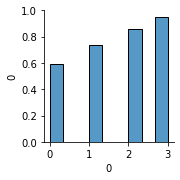

In [133]:
sns.pairplot(pred)